In [1]:
import os
os.chdir('../')
from helpers import *

mousenums:  ['230', '355', '358', '362', '673', '674', '816', '825']


In [2]:
mousenums = ['230', '355', '362', '673', '674', '816', '825']

In [3]:
epm_rs = []
rat1_rs = []
ctypes = []
for mouse in mousenums:
    track1, neur1, behav1 = getdicts(foldnames, mouse, 'epm')
    track2, neur2, behav2 = getdicts(foldnames, mouse, 'rat1')
    calc1, calc2 = getcalcs(foldnames, mouse, 'epm', 'rat1')
    
    threat = epmthreat(track1['mouse_positionMS'], behav1)
    xpos = track2['mouse_positionMS'][:, 0]
    xpos = minmaxscale(xpos, 0, 70, np.max(track2['rat_positionMS'][:, 0]))
    rr = []
    for k in range(calc1.shape[1]):
        ctypes.append(celltypebehav(calc1[:, k], behav1))
        epm_rs.append(pearsonr(calc1[:, k], threat)[0])
        rat1_rs.append(pearsonr(calc2[:, k], xpos)[0])
        rr.append(pearsonr(calc2[:, k], xpos)[0])
        
        if len(ctypes) == 102: # 102
            print(mouse, k)
            xpos_pos = xpos
            c_pos = zscore(calc2[:, k])
        if len(ctypes) == 41: # 41
            print(mouse, k)
            xpos_neg = xpos
            c_neg = zscore(calc2[:, k])

355 23
673 17


In [4]:
epm_rs = np.array(epm_rs)
rat1_rs = np.array(rat1_rs)
ctypes = np.array(ctypes)

In [5]:
for typ in ['o', 'n', 'c']:
    print(np.sum(ctypes == typ))

64
166
87


In [6]:
ranksums(rat1_rs[ctypes=='o'], rat1_rs[ctypes=='c'])

RanksumsResult(statistic=3.885965253680618, pvalue=0.00010192408538779132)

RanksumsResult(statistic=3.885965253680618, pvalue=0.00010192408538779132)


Text(0, 0.5, 'correlation of dF/F\nwith x position (rat)')

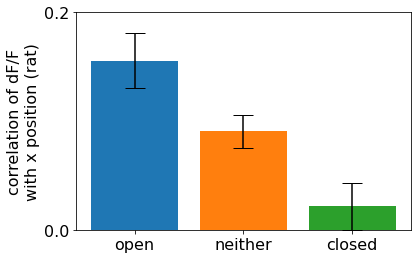

In [7]:
for i, typ in enumerate(['o', 'n', 'c']):
    plt.bar(i, np.mean(rat1_rs[ctypes == typ]))
    plt.errorbar(i, np.mean(rat1_rs[ctypes == typ]), sem(rat1_rs[ctypes == typ]), fmt='k_', ms=0, capsize=10)
print(ranksums(rat1_rs[ctypes=='o'], rat1_rs[ctypes=='c']))
plt.xticks([0, 1, 2], ['open', 'neither', 'closed'])
plt.ylim(0, 0.2)
plt.yticks([0, 0.2])
plt.ylabel('correlation of dF/F\nwith x position (rat)')

plt.savefig('./elife_figs/3s3C.svg')

In [71]:
c_open = np.array([35., 147, 209])/255*0.8
c_closed = np.array([2., 138, 74])/255*0.8

0.43311114299197667
(0.7529202195505333, 0.0)
0.8777080889574583
(-0.3497026037114131, 4.0340951141136036e-258)


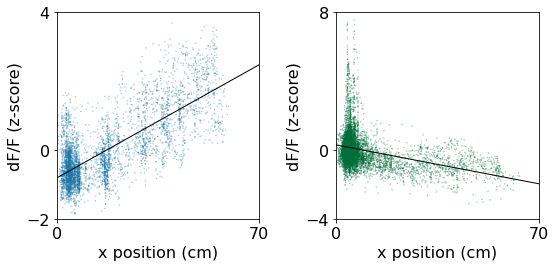

In [90]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(xpos_pos, c_pos, s=1, alpha=1, facecolors='none', edgecolors=c_open, lw=0.2)
plt.xticks([0, 70])
plt.xlim(0, 70)
plt.ylim(-2, 4)
plt.yticks([-2, 0, 4])
plt.xlabel('x position (cm)')
plt.ylabel('dF/F (z-score)')

lr = LR()
lr.fit(xpos_pos[:, None], c_pos)
plt.plot(plt.xlim(), lr.predict(np.array(plt.xlim())[:, None]), 'k', lw=1)

c_p = lr.predict(xpos_pos[:, None])
mse = np.mean((c_pos-c_p)**2)
print(mse)
mse_pos_lin = mse

print(pearsonr(xpos_pos, c_pos))

plt.subplot(1, 2, 2)
plt.scatter(xpos_neg, c_neg, s=1, alpha=1, facecolors='none', edgecolors=c_closed, lw=0.2)
plt.xticks([0, 70])
plt.xlim(0, 70)
plt.ylim(-4, 8)
plt.yticks([-4, 0, 8])
plt.xlabel('x position (cm)')
plt.ylabel('dF/F (z-score)')

lr = LR()
lr.fit(xpos_neg[:, None], c_neg)
plt.plot(plt.xlim(), lr.predict(np.array(plt.xlim())[:, None]), 'k', lw=1)

c_p = lr.predict(xpos_neg[:, None])
mse = np.mean((c_neg-c_p)**2)
print(mse)
mse_neg_lin = mse

print(pearsonr(xpos_neg, c_neg))

plt.tight_layout()

plt.savefig('./elife_figs/3s3B.svg')

0.43311114299197667
(0.7529202195505333, 0.0)
0.8777080889574583
(-0.3497026037114131, 4.0340951141136036e-258)


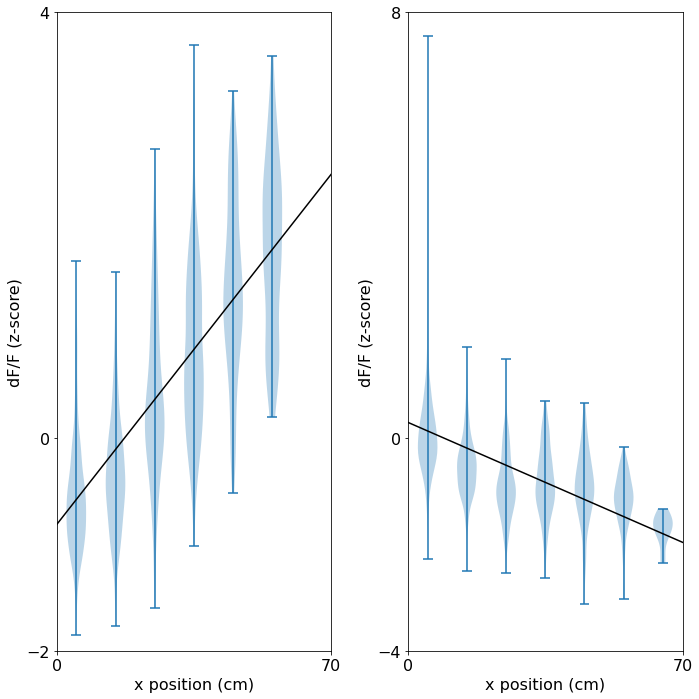

In [30]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
binned_xpos_pos = [xpos_pos[(xpos_pos >= i*10)*(xpos_pos < (i+1)*10)] for i in range(6)]
binned_c_pos = [c_pos[(xpos_pos >= i*10)*(xpos_pos < (i+1)*10)] for i in range(6)]
plt.violinplot(binned_c_pos, positions=np.arange(6)*10+5, widths=5)


plt.xticks([0, 70])
plt.xlim(0, 70)
plt.ylim(-2, 4)
plt.yticks([-2, 0, 4])
plt.xlabel('x position (cm)')
plt.ylabel('dF/F (z-score)')

lr = LR()
lr.fit(xpos_pos[:, None], c_pos)
plt.plot(plt.xlim(), lr.predict(np.array(plt.xlim())[:, None]), 'k')

c_p = lr.predict(xpos_pos[:, None])
mse = np.mean((c_pos-c_p)**2)
print(mse)
mse_pos_lin = mse

print(pearsonr(xpos_pos, c_pos))

plt.subplot(1, 2, 2)
#plt.scatter(xpos_neg, c_neg, s=1)
binned_xpos_neg = [xpos_neg[(xpos_neg >= i*10)*(xpos_neg < (i+1)*10)] for i in range(7)]
binned_c_neg = [c_neg[(xpos_neg >= i*10)*(xpos_neg < (i+1)*10)] for i in range(7)]
plt.violinplot(binned_c_neg, positions=np.arange(7)*10+5, widths=5)


plt.xticks([0, 70])
plt.xlim(0, 70)
plt.ylim(-4, 8)
plt.yticks([-4, 0, 8])
plt.xlabel('x position (cm)')
plt.ylabel('dF/F (z-score)')

lr = LR()
lr.fit(xpos_neg[:, None], c_neg)
plt.plot(plt.xlim(), lr.predict(np.array(plt.xlim())[:, None]), 'k')

c_p = lr.predict(xpos_neg[:, None])
mse = np.mean((c_neg-c_p)**2)
print(mse)
mse_neg_lin = mse

print(pearsonr(xpos_neg, c_neg))

plt.tight_layout()

plt.savefig('./elife_figs/3s3B_violin.svg')

In [4]:
from scipy.optimize import curve_fit

In [5]:
def exp_reg(x, a, b, c):
    return a*np.exp(b*x) + c

In [11]:
opt, pcov = curve_fit(exp_reg, xpos_pos, c_pos, p0=(1, 0.01, 0))
a, b, c = opt

0.4263379931958368


(-2.0, 4.0)

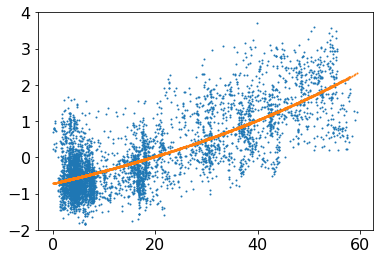

In [12]:
plt.scatter(xpos_pos, c_pos, s=1)
c_p = a*np.exp(b*xpos_pos)+c
mse = np.mean((c_pos-c_p)**2)
mse_pos_exp = mse
print(mse)
plt.scatter(xpos_pos, c_p, s=1)
plt.ylim(-2, 4)

In [13]:
opt, pcov = curve_fit(exp_reg, xpos_neg, c_neg, p0=(1, -0.01, 0))
a, b, c = opt
print(opt)

[ 1.92040259 -0.03541538 -1.46876551]


0.8709276094982724


(-2.0, 4.0)

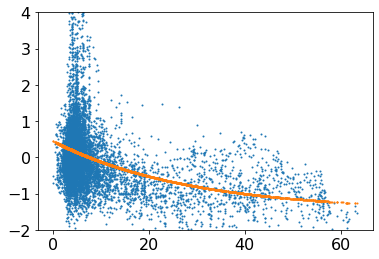

In [14]:
plt.scatter(xpos_neg, c_neg, s=1)
c_p = a*np.exp(b*xpos_neg)+c
mse = np.mean((c_neg-c_p)**2)
mse_neg_exp = mse
print(mse)
plt.scatter(xpos_neg, c_p, s=1)
plt.ylim(-2, 4)

Text(2, 0.2, 'exponential prediction\nat x=10cm')

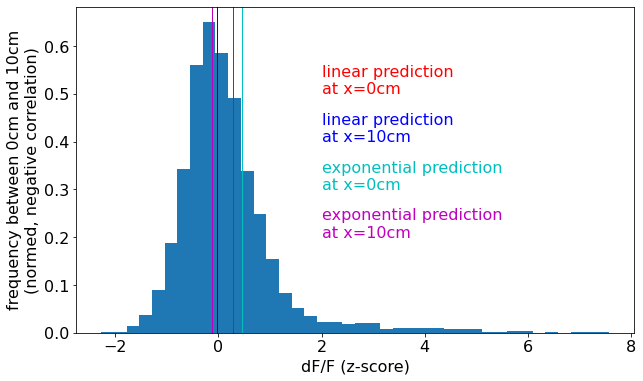

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(c_neg[xpos_neg < 10].flatten(), bins=40, density=True)
lr = LR()
lr.fit(xpos_neg[:, None], c_neg)
plt.plot(lr.predict([[0]]), 0, 'r|', ms=2000)
plt.plot(lr.predict([[10]]), 0, 'b|', ms=2000)
plt.plot(a*np.exp(b*0)+c, 0, 'c|', ms=2000)
plt.plot(a*np.exp(b*10)+c, 0, 'm|', ms=2000)
plt.xlabel('dF/F (z-score)')
plt.ylabel('frequency between 0cm and 10cm\n(normed, negative correlation)')
plt.text(2, 0.5, 'linear prediction\nat x=0cm', color='r')
plt.text(2, 0.4, 'linear prediction\nat x=10cm', color='b')
plt.text(2, 0.3, 'exponential prediction\nat x=0cm', color='c')
plt.text(2, 0.2, 'exponential prediction\nat x=10cm', color='m')

In [16]:
print('Linear MSE, positive: {:.3}'.format(mse_pos_lin))
print('exponential MSE, positive: {:.3}'.format(mse_pos_exp))
print('Variance, positive: {:.3}'.format(c_pos.var()))
print('Linear MSE, negative: {:.3}'.format(mse_neg_lin))
print('exponential MSE, negative: {:.3}'.format(mse_neg_exp))
print('Variance, negative: {:.3}'.format(c_neg.var()))

Linear MSE, positive: 0.433
exponential MSE, positive: 0.426
Variance, postive: 1.0
Linear MSE, negative: 0.878
exponential MSE, negative: 0.871
Variance, postive: 1.0


In [6]:
mses_exp = []
mses_lin = []
for mouse in mousenums:
    track1, neur1, behav1 = getdicts(foldnames, mouse, 'epm')
    track2, neur2, behav2 = getdicts(foldnames, mouse, 'rat1')
    calc1, calc2 = getcalcs(foldnames, mouse, 'epm', 'rat1')
    calc2 = zscore(calc2)
    
    threat = epmthreat(track1['mouse_positionMS'], behav1)
    L = calc2.shape[0]
    L2 = calc2.shape[0]//2
    xpos = track2['mouse_positionMS'][:, 0]
    xpos = minmaxscale(xpos, 0, 70, np.max(track2['rat_positionMS'][:, 0]))
    for cell in range(calc2.shape[1]):
        corr = pearsonr(xpos[0:L2], calc2[0:L2, cell])[0]
        try:
            opt, pcov = curve_fit(exp_reg, xpos[0:L2], calc2[0:L2, cell], p0=(1, 0.1, 0))
        except:
            opt, pcov = curve_fit(exp_reg, xpos[0:L2], calc2[0:L2, cell], p0=(1, -0.1, 0))
        a, b, c = opt
        
        calc_p = a*np.exp(b*xpos[L2+75:None])+c
        mse_exp = np.mean((calc_p-calc2[L2+75:None, cell])**2)
        mses_exp.append(mse_exp)
        
        lr = LR()
        lr.fit(xpos[0:L2, None], calc2[0:L2, cell])
        
        calc_p = lr.predict(xpos[L2+75:None, None])
        mse_lin = np.mean((calc_p-calc2[L2+75:None, cell])**2)
        mses_lin.append(mse_lin)
mses_exp = np.array(mses_exp)
mses_lin = np.array(mses_lin)

In [7]:
print(len(mses_exp))

317


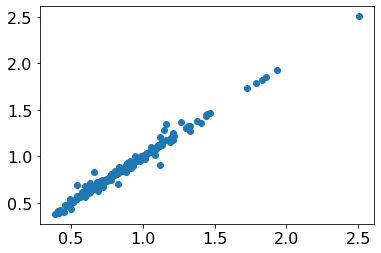

In [34]:
plt.scatter(mses_lin, mses_exp)

In [39]:
from scipy.stats import wilcoxon

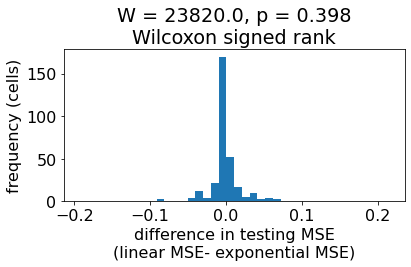

In [49]:
_ = plt.hist(mses_lin - mses_exp, bins=40)
plt.xlabel('difference in testing MSE\n(linear MSE- exponential MSE)')
plt.ylabel('frequency (cells)')
plt.title('W = {}, p = {:.3}'.format(*wilcoxon(mses_lin, mses_exp)) + '\nWilcoxon signed rank')
plt.tight_layout()
plt.savefig('./elife_figs/exp_vs_lin_fit_mse.svg')

In [40]:
wilcoxon(mses_lin, mses_exp)

WilcoxonResult(statistic=23820.0, pvalue=0.39760045704865776)